# Read in data

In [1]:
import pandas as pd
import csv

path = '../../data/incels/all_comments.csv'
# data = pd.read_csv(path, engine='python', on_bad_lines=lambda x: print(x))
data = pd.read_csv(path, engine='python', on_bad_lines=lambda row: row[:-2].append(' '.join(row[-2:]))) # combine last 2 elements in a line mentioning Gulag
data['parsed_date'] = pd.to_datetime(data.date, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248230 entries, 0 to 6248229
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   type         object        
 1   forum        object        
 2   thread       object        
 3   username     object        
 4   date         object        
 5   content      object        
 6   parsed_date  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 333.7+ MB


In [8]:
data.forum.value_counts()

002-InceldomDiscussion    3725701
003-TheLounge             1794926
004-TheSewers              714612
001-MustReadContent         11476
005-BanAppeals               1514
Name: forum, dtype: int64

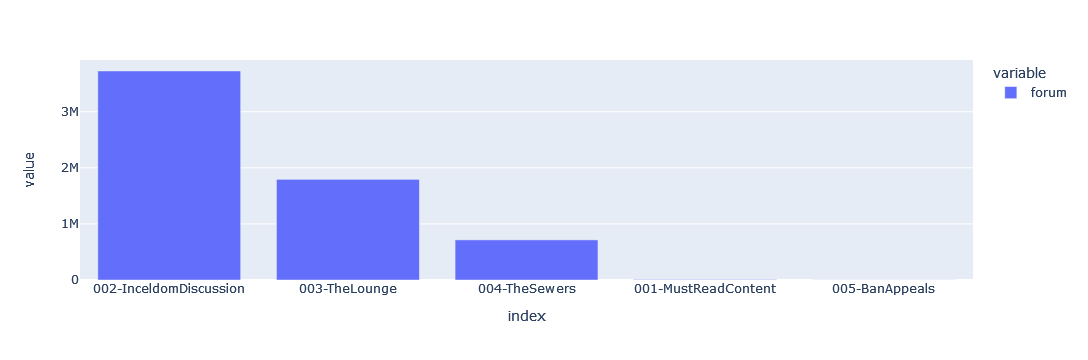

In [7]:
data.forum.value_counts().plot.bar()

In [10]:
len(data.username.unique())

8469

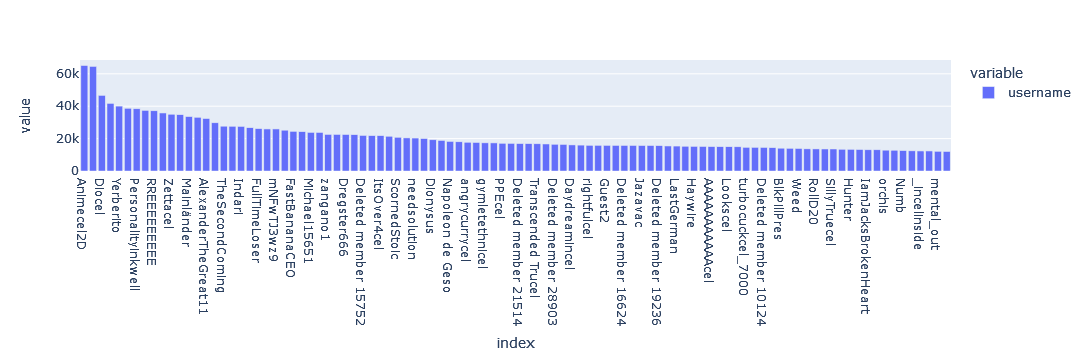

In [3]:
pd.options.plotting.backend = 'plotly'
data.username.value_counts()[:100].plot.bar()

In [6]:
data.username.value_counts().head(20)

Animecel2D             65096
unsettling             64547
Diocel                 46666
nihility               41736
Yerberito              40084
Cuyen                  38719
Personalityinkwell     38414
ihaveno1               37405
RREEEEEEEEE            37175
Insomniac              35820
Zettacel               35063
Blacktarpill           34754
Mainländer             33579
FinnCel                33162
AlexanderTheGreat11    32369
pp183                  29766
TheSecondComing        27673
Robtical               27610
Indari                 27509
your personality       26714
Name: username, dtype: int64

In [16]:
data[['date']]

,date
0,"Nov 20, 2020"
1,"Nov 20, 2020"
2,"Nov 20, 2020"
3,"Nov 20, 2020"
4,"Nov 20, 2020"
...,...
6248225,"Feb 20, 2018"
6248226,"Feb 21, 2018"
6248227,"Feb 21, 2018"
6248228,"Jan 24, 2020"


In [23]:
# pd.to_datetime(data.date, format="%b %-d, %Y")
pd.to_datetime(data.date, errors='coerce') # 5747 dates say 'Yesterday'

0         2020-11-20
1         2020-11-20
2         2020-11-20
3         2020-11-20
4         2020-11-20
             ...    
6248225   2018-02-20
6248226   2018-02-21
6248227   2018-02-21
6248228   2020-01-24
6248229   2020-07-19
Name: date, Length: 6248230, dtype: datetime64[ns]

In [22]:
data.date.str.contains('Yesterday').sum()

5747

In [ ]:
pd.options.plotting.backend = 'plotly'
data.sample(int(1e6)).parsed_date.plot.hist()

In [7]:
print(data.parsed_date.min())
data.parsed_date.max()

2017-11-07 00:00:00


Timestamp('2021-04-07 00:00:00')